<a href="https://colab.research.google.com/github/pawanshaw66/ML-Health_Insurance/blob/main/Health_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


## Load the Dataset

In [ ]:
df = pd.read_csv('/content/insurance.csv')

## Check first five rows of dataset

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check last five rows of dataset

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Find shape of our dataset 

In [ ]:
df.shape

(1338, 7)

In [ ]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  1338
Number of Columns:  7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Check Null values in dataset

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Overall statistics about the dataset

In [ ]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Convert columns from string['Sex','Smoking','region'] to Numerical values

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex'] = df['sex'].map({'female':0, 'male':1})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region'] = df['region'].map({'southwest':1, 'southeast':2,
                                 'northwest':3, 'northeast':4})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


## Store feature matrix in X and response(Target) in vector y

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
X = df.drop(['charges'],axis=1)

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [ ]:
y = df['charges']

In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

## Import models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model Training

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

## Prediction on test data

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})


In [ ]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,9892.717326,11001.128629
887,5272.17580,7116.295018,9492.515425,5173.515258,5840.174656
890,29330.98315,36909.013521,9648.758701,28483.017233,28001.980112
1293,9301.89355,9507.874691,9555.044136,10840.637627,9745.291602
259,33750.29180,27013.350008,9420.421978,34291.758259,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47317.381920,45431.423211
575,12222.89830,11814.555568,9625.431547,12921.454364,12465.025294
535,6067.12675,7638.107736,9504.168517,6343.172217,6974.336525
543,63770.42801,40959.081722,9605.004594,46686.939462,47862.047791


## Compare Performance Visually

In [ ]:
import matplotlib.pyplot as plt

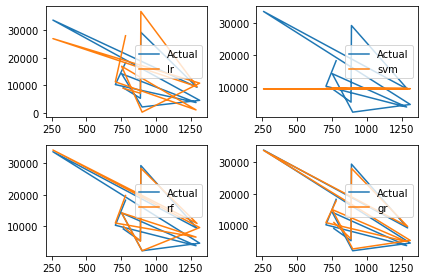

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()

plt.tight_layout()


## Evaluting the model

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [ ]:
print(score1, score2, score3, score4)

0.7833463107364539 -0.07229762787861826 0.8663472830611805 0.8779726251291786


In [ ]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [ ]:
print(s1, s2, s3, s4)  # lower is better

4186.508898366434 8592.428727899724 2488.4428024296117 2447.9515580545844


## Perdict charges for new customer

In [ ]:
df = {'col':0,
    'age':40,
      'age':1,
      'bmi':40.35,
      'children':3,
      'smoker':1,
      'region':2}
df = pd.DataFrame(df, index=[0])
df      

,col,age,bmi,children,smoker,region
0,0,1,40.35,3,1,2


In [ ]:
new_pred = gr.predict(df)
print(new_pred)

[37543.46994581]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- col
Feature names seen at fit time, yet now missing:
- sex

  warnings.warn(message, FutureWarning)


## Save our Model using Joblib

In [ ]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [ ]:
import joblib 

In [ ]:
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model = joblib.load('model_joblib_gr')

In [ ]:
model.predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- col
Feature names seen at fit time, yet now missing:
- sex

  warnings.warn(message, FutureWarning)


array([38926.02407642])

In [ ]:
from tkinter import*